# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Activation
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
import pickle
import heapq
import string

# Loading Data

In [2]:
data = open("data.txt", "r", encoding = "utf8").read().lower()
print("Length of data: ", len(data))
data[:500]

Length of data:  581870


"project gutenberg's the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nrelease date: november 29, 2002 [ebook #1661]\nlast updated: may 20, 2019\n\nlanguage: english\n\ncharacter"

# Data Preprocessing

### Cleaning Data

In [3]:
data = data.replace('\n', ' ')
print("Length of data: ", len(data))
data[:500]

Length of data:  581870


"project gutenberg's the adventures of sherlock holmes, by arthur conan doyle  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.net  title: the adventures of sherlock holmes  author: arthur conan doyle  release date: november 29, 2002 [ebook #1661] last updated: may 20, 2019  language: english  character"

In [4]:
# Replacing multiple spaces with single spaces
text = []
for i in data.split():
    if i not in text:
        text.append(i)  
data = ' '.join(text)
print("Length of data: ", len(data))
data[:500]

Length of data:  121909


"project gutenberg's the adventures of sherlock holmes, by arthur conan doyle this ebook is for use anyone anywhere at no cost and with almost restrictions whatsoever. you may copy it, give it away or re-use under terms gutenberg license included online www.gutenberg.net title: holmes author: release date: november 29, 2002 [ebook #1661] last updated: 20, 2019 language: english character set encoding: utf-8 *** start produced an anonymous volunteer jose menendez cover contents i. a scandal in boh"

In [5]:
# Finding unique characters in the corpus
chars = sorted(list(set(data)))
chars_size = len(chars)
print ("Total unique characters are: ", chars_size)

Total unique characters are:  71


In [6]:
# Indexing characters
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [7]:
# Saving char_indices and indices_char dictionary
pickle.dump(char_indices, open('char_indices.pkl', 'wb'))
pickle.dump(indices_char, open('indices_char.pkl', 'wb'))

### Feature Extraction

In [8]:
# Dividing text into chuncks of 40 characters
SEQUENCE_LENGTH = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(data) - SEQUENCE_LENGTH, step):
    sentences.append(data[i:i+SEQUENCE_LENGTH])
    next_chars.append(data[i+SEQUENCE_LENGTH])
print ('Total input sentences: ', len(sentences))

Total input sentences:  40623


In [9]:
# Generating features and labels
x = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
        x[i, j, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print("Features: \n", x[0])
print("\nLabels: \n", y[0])

C:\Users\TEMP\ipykernel_6756\57373370.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
C:\Users\TEMP\ipykernel_6756\57373370.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


Features: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

Labels: 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


# Building Model 

In [10]:
# Creating model
model = Sequential();
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, chars_size), return_sequences=True))
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, chars_size)))
model.add(Dense(1000, activation="relu"))
model.add(Dense(chars_size, activation="softmax"))

In [11]:
# Printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 128)           102400    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1000)              129000    
                                                                 
 dense_1 (Dense)             (None, 71)                71071     
                                                                 
Total params: 434,055
Trainable params: 434,055
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Training model
model.compile(loss = "categorical_crossentropy", optimizer = Adam(lr = 0.01), metrics = ['accuracy'])
history = model.fit(x, y, validation_split = 0.05, epochs = 20, batch_size = 64).history

C:\Users\Khushi\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
603/603 [==============================] - 94s 143ms/step - loss: 2.6057 - accuracy: 0.2336 - val_loss: 2.6874 - val_accuracy: 0.2613
Epoch 2/20
603/603 [==============================] - 83s 137ms/step - loss: 2.3017 - accuracy: 0.2978 - val_loss: 2.5865 - val_accuracy: 0.2938
Epoch 3/20
603/603 [==============================] - 79s 132ms/step - loss: 2.1871 - accuracy: 0.3227 - val_loss: 2.5996 - val_accuracy: 0.3071
Epoch 4/20
603/603 [==============================] - 79s 132ms/step - loss: 2.0928 - accuracy: 0.3454 - val_loss: 2.4827 - val_accuracy: 0.3164
Epoch 5/20
603/603 [==============================] - 81s 135ms/step - loss: 2.0009 - accuracy: 0.3705 - val_loss: 2.5909 - val_accuracy: 0.3199
Epoch 6/20
603/603 [==============================] - 83s 138ms/step - loss: 1.9099 - accuracy: 0.3933 - val_loss: 2.5026 - val_accuracy: 0.3391
Epoch 7/20
603/603 [==============================] - 84s 139ms/step - loss: 1.8206 - accuracy: 0.4178 - val_loss: 2.5740 - val_ac

In [13]:
# Saving model
model.save('model.h5')
pickle.dump(history, open('history.p', 'wb'))

## Evaluating Model

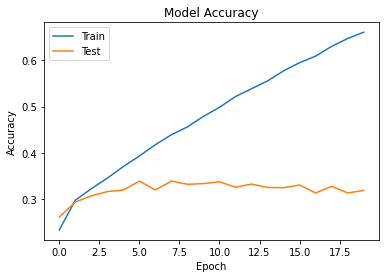

In [14]:
# Accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'upper left')

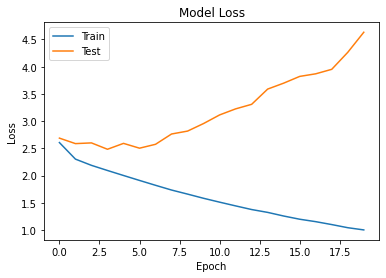

In [15]:
# Loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'upper left')

## Making Prediction

In [16]:
# Loading model
model = load_model('model.h5')
history = pickle.load(open('history.p', 'rb'))

In [17]:
# Prepare Input function: This function creates input features for given sentence
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, chars_size))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.0
    return x

In [18]:
# Sample function: This function allows us to ask our model what are the next probable characters
def sample(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    np.seterr(divide = 'ignore')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [19]:
# Predict Completion function: This function is used to predict next characters
def predict_completion(text):
    original_text = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [20]:
# Predict Completions function: This function wraps everything and allows us to predict multiple completions
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[i] + predict_completion(text[1:] + indices_char[i]) for i in next_indices]

In [21]:
quotes = [
    "There are several people near the paveme",
    "This project develops a Next Word Predicti",
]

In [22]:
for q in quotes:
    seq = q[:SEQUENCE_LENGTH].lower()
    print(seq)
    print(predict_completions(seq, 3))
    print()

there are several people near the paveme
['nt ', 'r ', 'd ']

this project develops next word predicti
['ve ', 'on, ', 'ng ']

